# Working with Federated Servers

If the GIS is the work horse for managing content, users and items for the ArcGIS Online/Portal product, then the Server module is the entry into the management of services, users, and other system properties for **ArcGIS Server**.
<hr/>

### Getting Help with Server

You can print a list of help associated with the Server object at anytime by doing the following from ipython or command line.

In [ ]:
from arcgis.gis.server import Server
help(Server)

### Login as Administrator for Enterprise GIS

The Enterprise GIS is accessed by logining into the Enterprise GIS via the **GIS** object and accessed off of the admin property.


*Note: server access is only exposed for Enterprise GIS not ArcGIS Online*

In [1]:
from arcgis.gis import GIS
gis = GIS('https://python.playground.esri.com/portal',
          username='arcgis_python',
          password='amazing_arcgis_123',
          verify_cert=False)

### Access the admin Property and Servers

In [2]:
admin = gis.admin
servers = admin.servers

The server administration property provides a wealth of interaction with federated servers.

<div>
    <img src="staticimgs/ServerManager.png" alt="sm" align="left"/>
</div>

### Listing Servers

Seeing what is registered with Enterprise GIS is the first step into working with the GIS server infrastructure.

- list() provides a list of Server objects.


In [3]:
servers.list()

[<Server at https://python.playground.esri.com/server>,
 <Server at https://python-ga.playground.esri.com/server>,
 <Server at https://python-ra.playground.esri.com/arcgis>]

### Finding Server by Role/Function

When working with the Enterprise infrastructure, servers can be designated roles or functions and can be found by those roles.  

For example instead of listing all servers, administrators could find a server by it's role of a HOSTING_SERVER.


In [6]:
servers.get(role="HOSTING_SERVER")

[<Server at https://python.playground.esri.com/server>]

### Verifying Server Status

- helps ensures stable server environment
- finds invalid/down servers
- True means all is well with the system, False means 1 or more servers is down.

In [10]:
servers.validate()

True

### Server Management

Server management is the entry point to work with the administration server side of your enterprise.  The server object allows users to access the following:

- logs
- datastores
- machines
- services
- usage statistics
- system operations

Each operation contains tools specific to a section of server.

To access the servers, use either the list() or get() off of the gis.admin.servers property.


In [8]:
hosting_server = servers.get(role="HOSTING_SERVER")[0]

Each Server object allows for rich interaction between the administrator and the server itself.  
<div>
    <img src="staticimgs/ServerObjectProperties.png" alt="sm" align="left"/>
</div>

#### Working with Logs

Logs provide the information from the ArcGIS Server and help administrators trouble shoot problems.

In [9]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
# Accesing the logs property
logs = hosting_server.logs

##### Example Query and Filtering Log Messages

In [10]:
res = logs.query(start_time=start_time)['logMessages']
df = pd.DataFrame.from_records(res)
df[['code', 'message']].head()

,code,message
0,20010,Error executing tool. CreateBuffers Job ID: j6...
1,500000,Table not registered [db_60vw8.hsu_a635a.Fire_...
2,500000,Portal request createService failed with error...
3,20010,Error executing tool. CreateBuffers Job ID: j6...
4,500000,Table not registered [db_60vw8.hsu_a635a.Fire_...


### Server Usage

- helps manage system resources 
- find high use servers and services


In [11]:
usage = hosting_server.usage

Usage reports can be accessed using the **list()** operation. 

In [12]:
report = usage.list()[0]

##### Example: Visualizing Service Usage

In [13]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

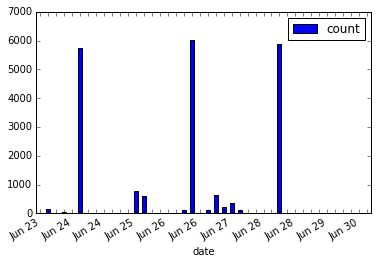

In [14]:
data = report.query()
data_y = data['report']['report-data'][0][0]['data']
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

#### Creating Quick Reports

Quick reports are useful for administrators who want to get a one shot set of data.  This information is generated on the fly on ArcGIS Server, and allows for report generation for services or server information that may not be monitored all the time.  


***Note***

***On the fly reports that are deleted right after data is returned***

The quick report supports various time spans:

- LAST_DAY - 24 hours from your current time
- LAST_WEEK - 7 days from your current date
- LAST_MONTH - 31 days from your current date
- LAST_YEAR - 365 days from your current date

Reporting Queries are made by specifying the resource you want to monitor.  For example, administrators who want to monitor a specific folder, **HOSTED**, would set the query to: services/Hosted.  The default is to monitor all services.

Quick report metrics are:

- RequestCount - the number of requests received
- RequestsFailed - the number of requests that failed
- RequestsTimedOut - the number of requests that timed out
- RequestMaxResponseTime - the maximum response time
- RequestAvgResponseTime - the average response time
- ServiceActiveInstances - the maximum number of active (running) service instances sampled at 1 minute intervals, for a specified service

In [18]:
data = usage.quick_report(since="LAST_YEAR", metrics="RequestCount")

##### Example: Visualizing Quick Report Data

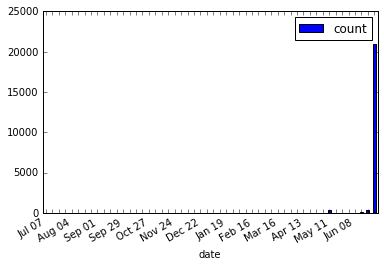

In [19]:
data_y = data['report']['report-data'][0][0]['data']
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

#### Service Management

Services provide information to user and it is essential that these services can be managed and maintained as effeciently as possible. 

- Accessed off of server
- Allows for editting of server properties
    - enabling extensions 
    - starting/stopping/deleting services
- Creating/Deleting Folders 


<div>
    <img src="staticimgs/SingleServerProps.png" alt="sm" align="left"/>
</div>

In [20]:
services = hosting_server.services

##### Example: Creating/Deleting a Folder

In [25]:
services.folders

['Hosted', 'System', 'Utilities', '/']

In [26]:
services.create_folder(folder="TEST_FOLDER")

True

In [27]:
services.folders

['Hosted', 'System', 'TEST_FOLDER', 'Utilities', '/']

In [28]:
services.delete_folder(folder="TEST_FOLDER")

True

In [29]:
services.folders

['Hosted', 'System', 'Utilities', '/']

#### Working with Individual Services

Services are accessed by a folder.  The root folder is the default folder.  

In [41]:
services = hosting_server.services.list()
services

[<Service at https://python.playground.esri.com/server/admin/services/elevation_270m.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/human_modification_index.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/ImgSrv_Landast_Montana2015.ImageServer>,
 <Service at https://python.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>]

#### Example: Listing Services in a Folder


In [31]:
services = hosting_server.services.list(folder='System')
services

[<Service at https://python.playground.esri.com/server/admin/services/System/CachingControllers.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingTools.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingToolsEx.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/DistributedWorker.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/DynamicMappingHost.MapServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/GeoAnalyticsManagement.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/GeoAnalyticsTools.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/PublishingTools.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/PublishingToolsEx.GPServer>,
 <Service at https://python.playground.esri.com/

#### Starting/Stopping a Service

In [34]:
services = hosting_server.services.list()
service = services[0]
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [35]:
service.stop()
service.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [36]:
service.start()
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

#### Editting the Service Properties

Service properties allow administrators to adjust the default properties on any service.

##### Example: Disabling KML Service End Point

In [47]:
ms = services[3]
properties = dict(ms.properties)
for ext in properties['extensions']:
    if ext['typeName'].lower() == "kmlserver":
        ext['enabled'] = 'false'

In [49]:
ms.edit(properties)

True

#### Deleting Services

Services can be deleted by invoking **service.delete()**.  This operation is **not reversible**.  Use with caution.